Storyansatz:könnte in Wetter-Apps zur Vorhersage eingesetzt werden, wenn kein Zugang zu vollständigen Wetterdaten besteht oder um lokale Sensoren intelligent auszuwerten
oder da in der Landwirtschaft oder Logistik einfache, robuste Wettervorhersagen wichtig für Planung und Risikomanagement sind.

## Data
* Temperature: in Celsius, from extreme heat to extreme cold
* Humidity: in Percentage, including values above 100% to introduce outliers
* Wind Speed: in kilometers per hour, with a range including unrealistically high values
* Precipitation: including outlier values
* Cloud Cover: The cloud cover description
* Atmospheric Pressure: in hPa, covering a wide range
* UV Index: indicating the strength of ultraviolet radiation
* Season: during which the data was recorded
* Visibility: in kilometers, including very low or very high values
* Location: The type of location where the data was recorded
* Weather Type: The target variable for classification, indicating the weather type. Includes Sunny, Cloudy, Snowy, Rainy

The Data is partially synthetic to include extreme conditions and incomplete data

### Laden der benötigten Module

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree


### Laden des Datensatzes

In [46]:
df = pd.read_csv('data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Erstellung von Plots, um eine Übersicht über die Daten zu erhalten


#### Plot zur Verteilung der Wettertypen

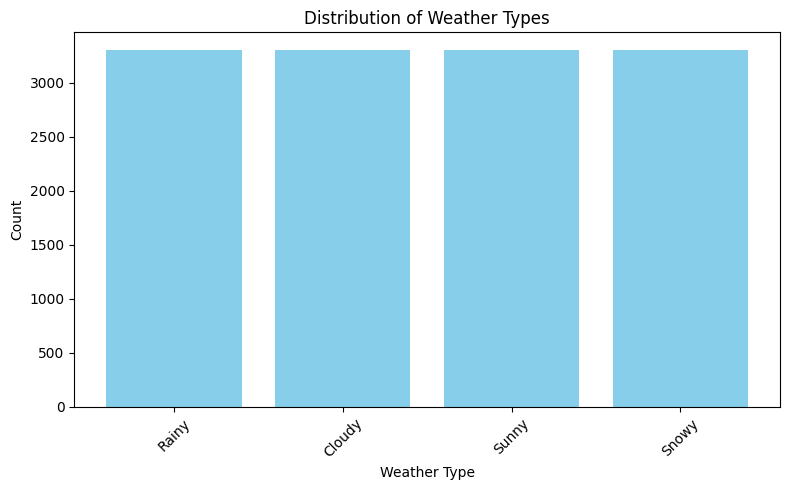

In [47]:
weather_counts = df['Weather Type'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(weather_counts.index, weather_counts.values, color='skyblue')
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alle Wettertypen kommen gleich oft vor

### Aufteilung in Trainings-und Testdaten

In [48]:
target_col = 'Weather Type' # --> Label
X = df.drop(columns=[target_col]) # entfernt die Labelspalte aus dem Datensatz -> nur die Features bleiben übrig
y = df[target_col] 

X = pd.get_dummies(X) # Wandelt Textdaten in Vorhanden Ja/Nein um sog. One-Hot-Encoding

# Aufteilen der Daten in Trainings- und Testdaten

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y) # test_size -> Prozentsatz wieviel der Daten zum Testen verwendet werden sollen
# random_state ist ein Seed der angibt, wie die Daten aufgeteilt werden sollen, ohne random_state würden sie jedes mal wenn der Code läuft 
# zufällig aufgeteilt werden und nicht wie bei dem letzen Durchlauf

#### Plot für die Korrelationsmatrix
 Zeigt an, wie stark zwei numerische Werte statistisch zusammenhängen. Keine Kausalität!
<p> </p>

 Bedeutung der Korrelationswerte:
* 1: positive Korrelation -> Werte steigen
* 0: kein Zusammenhang
* -1: negative Korrelation -> Werte sinken


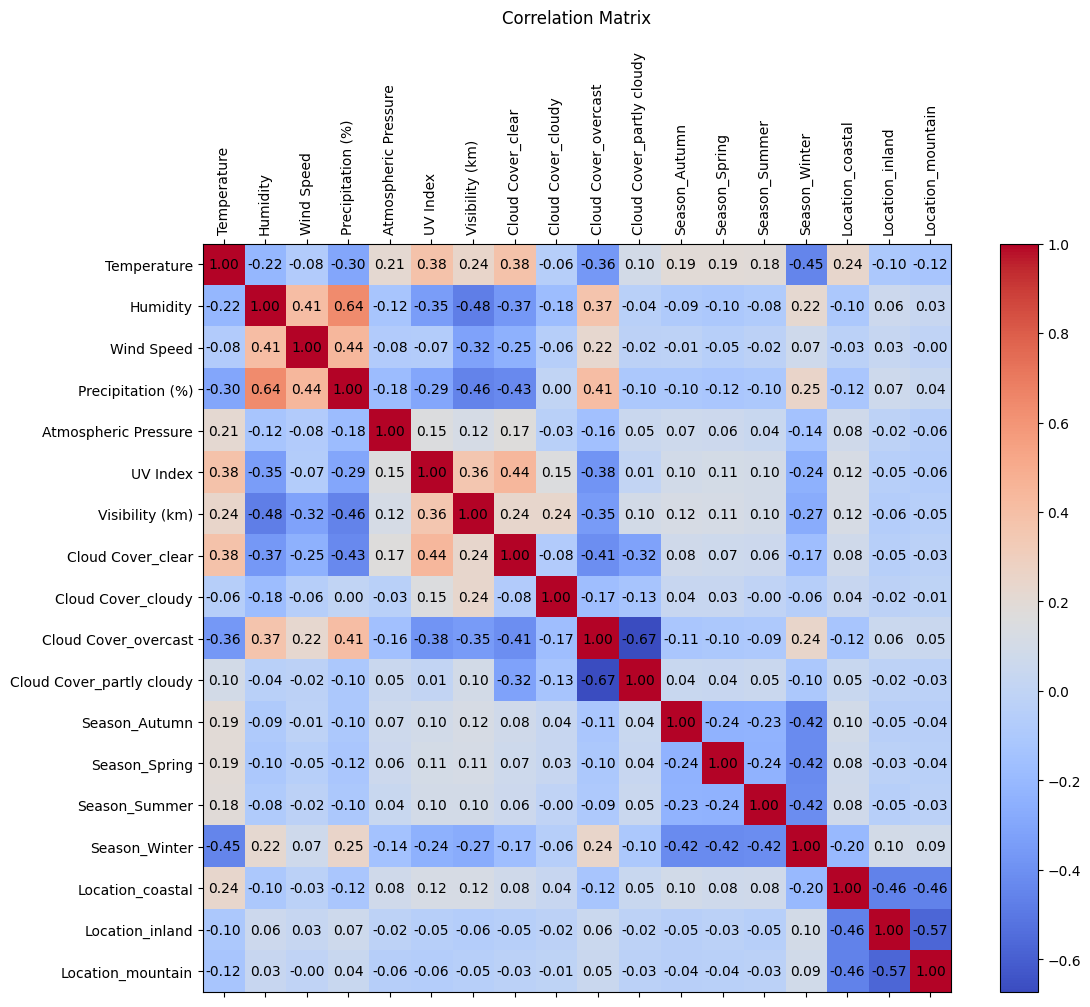

In [49]:
corr = X_train.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12, 10))
cax = ax.matshow(corr, cmap='coolwarm') # heatmap -> blau für negative, rot für positive Werte
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90) #Achsenbeschriftung
plt.yticks(range(len(corr.columns)), corr.columns)
fig.colorbar(cax)

for (i, j), val in np.ndenumerate(corr.values): # Korrelationswerte werden in die Matrix geschrieben
    ax.text(j, i, f"{val:.2f}", va='center', ha='center') # Werte werden auf 2 Nachkommastellen formatiert

plt.title('Correlation Matrix', pad=20)
plt.tight_layout()
plt.show()

#### Scatterplots
Erstellung mehrerer Scatterplots um eventuelle Ausreißer oder Cluster zu erkennen.



C:\Users\pasca\AppData\Local\Temp\ipykernel_11900\4261867114.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(weather_types)) # Erstellung der Colormap, um Wettertypen einzufärben. 'tab10' ist eine bereits vordefinierte Colormap von Matplotlib


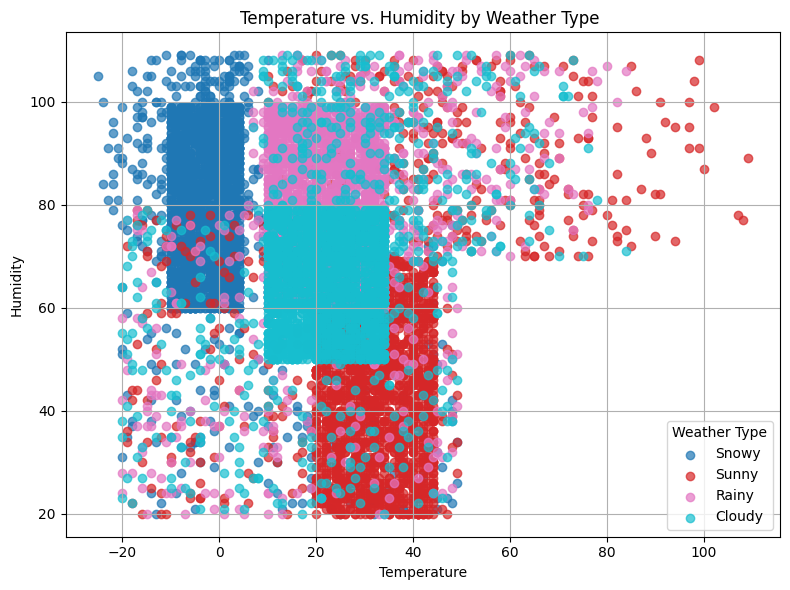

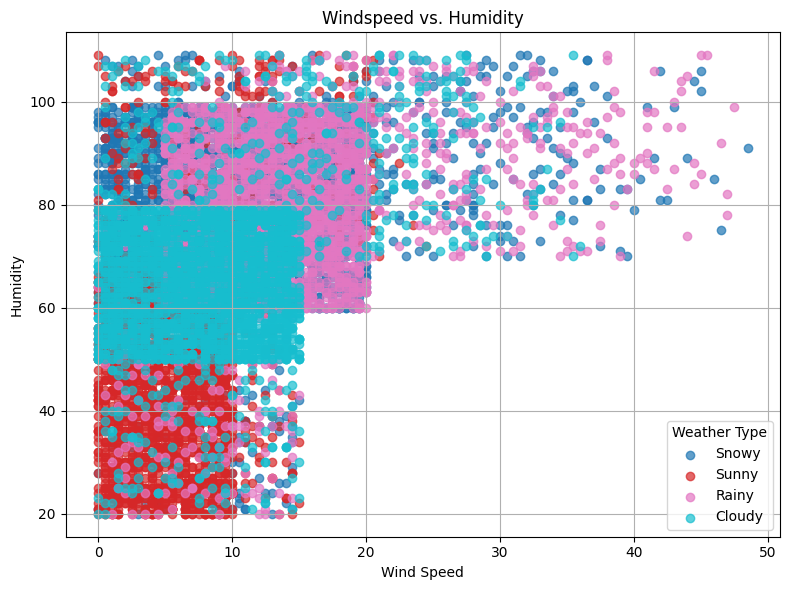

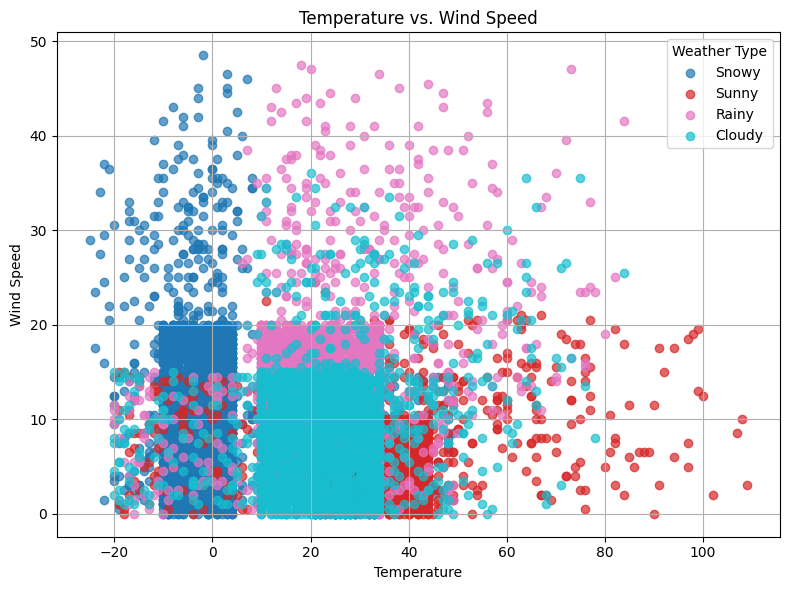

In [50]:
# Trainingsdaten und Zielvariablen kombinieren
train_df = X_train.copy()
train_df['Weather Type'] = y_train
weather_types = train_df['Weather Type'].unique()

colors = plt.cm.get_cmap('tab10', len(weather_types)) # Erstellung der Colormap, um Wettertypen einzufärben. 'tab10' ist eine bereits vordefinierte Colormap von Matplotlib

# Temperatur und Luftfeuchtigkeit
plt.figure(figsize=(8, 6))
for i, wt in enumerate(weather_types):
    subset = train_df[train_df['Weather Type'] == wt]
    plt.scatter(
        subset['Temperature'], 
        subset['Humidity'], 
        label=wt, 
        alpha=0.7, 
        color=colors(i)
    )
plt.title('Temperature vs. Humidity by Weather Type ')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Weather Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Windgeschwindigkeit und Luftfeuchtigkeit
plt.figure(figsize=(8, 6))
for i, wt in enumerate(weather_types):
    subset = train_df[train_df['Weather Type'] == wt]
    plt.scatter(subset['Wind Speed'], subset['Humidity'], label=wt, alpha=0.7, color=colors(i))

plt.title('Windspeed vs. Humidity')
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')
plt.legend(title='Weather Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Temperatur und Windgeschwindigkeit
plt.figure(figsize=(8, 6))
for i, wt in enumerate(weather_types):
    subset = train_df[train_df['Weather Type'] == wt]
    plt.scatter(subset['Temperature'], subset['Wind Speed'], label=wt, alpha=0.7, color=colors(i))

plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.legend(title='Weather Type')
plt.grid(True) # aktiviert Gitternetz
plt.tight_layout()
plt.show()


#### Temperatur, Luftfeuchtigkeit und Wind je nach Wettertyp 

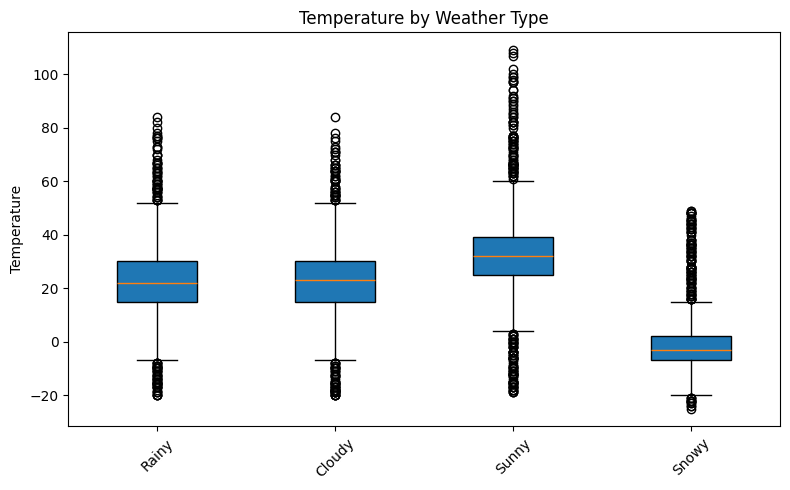

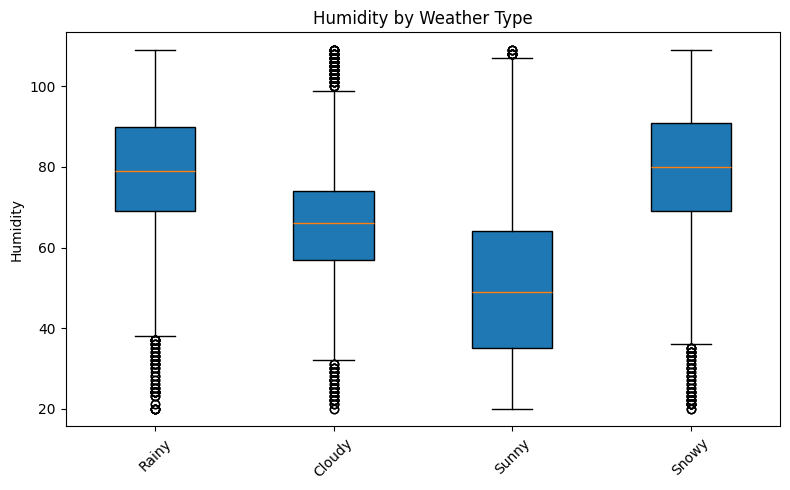

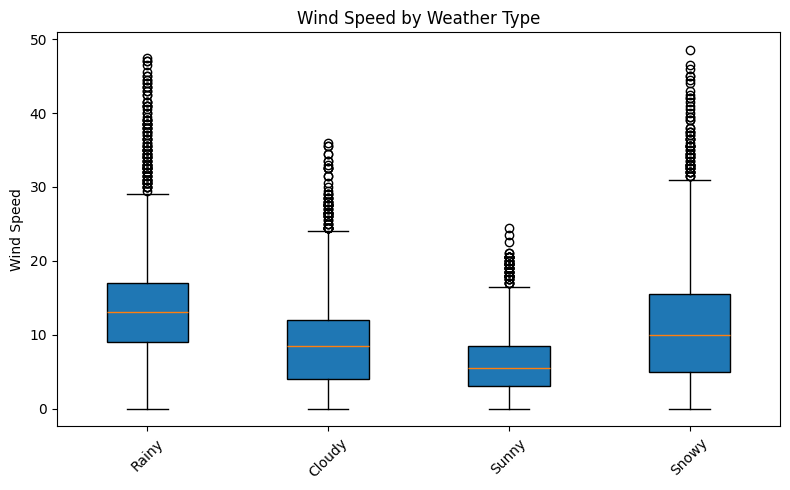

In [51]:
features = ['Temperature', 'Humidity', 'Wind Speed']
for feature in features:
    plt.figure(figsize=(8, 5))
    data = [train_df[train_df['Weather Type'] == wt][feature] for wt in df['Weather Type'].unique()]
    plt.boxplot(data, tick_labels=df['Weather Type'].unique(), patch_artist=True)
    plt.title(f'{feature} by Weather Type')
    plt.xticks(rotation=45)
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# Punkte stellen Ausreißer dar
# Die Box: beinhaltet 50% der Daten
# Linie in der Box: Der Median
# Whiskers (Striche): Spannweite der Temperatur ohne Ausreißer

### RandomForest


#### Erstellung und Training

In [52]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Klassifikator für den RandomForest -> Jeder Baum macht eine Vorhersage -> Mehrheitsvotum entscheidet
# n_estimators gibt die Anzahl an Bäumen an, welche verwendet werden soll
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

##### Erste 5 Bäume anzeigen lassen

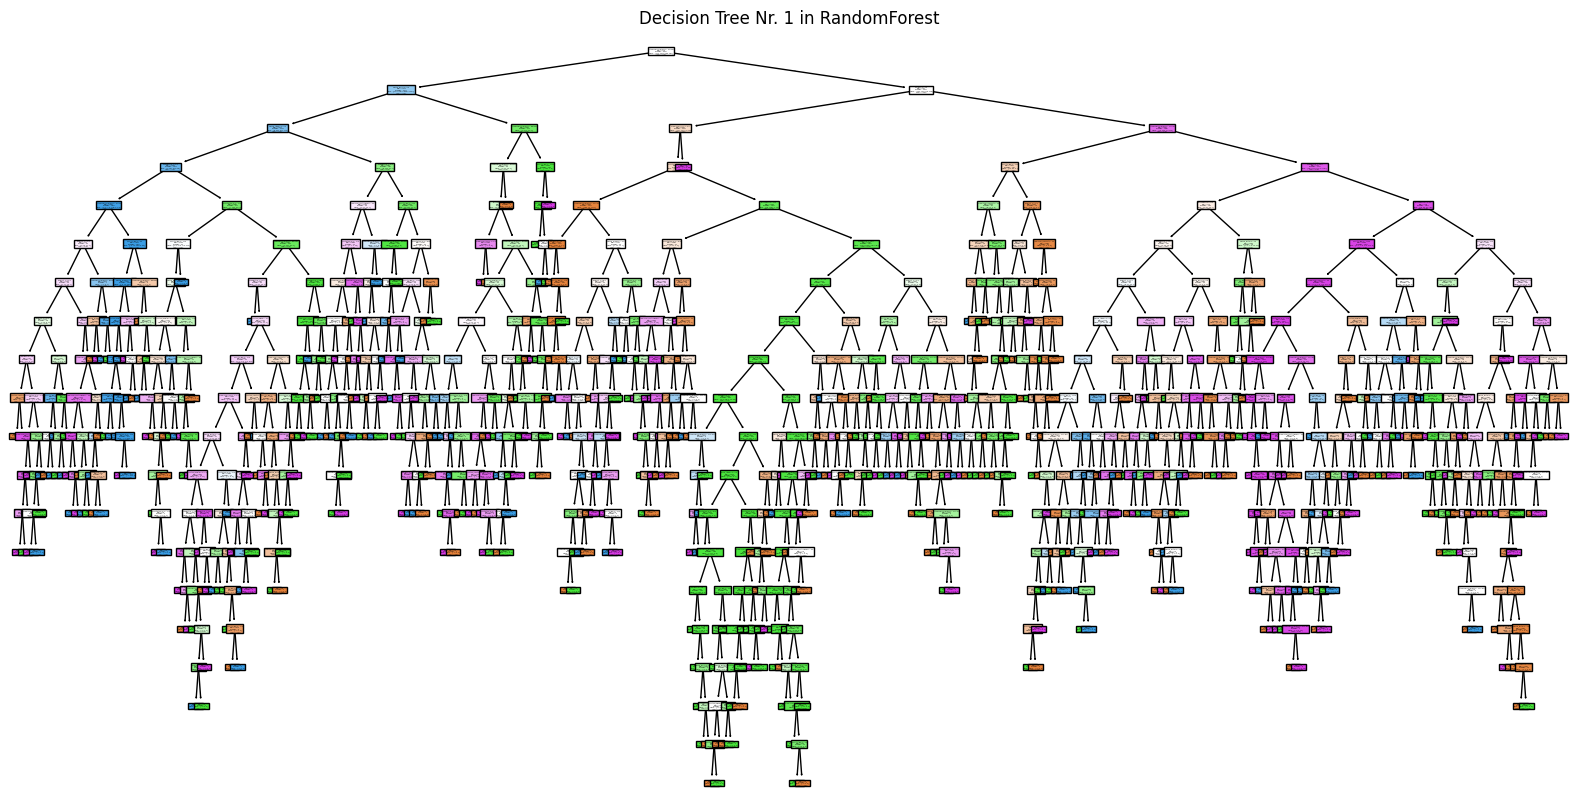

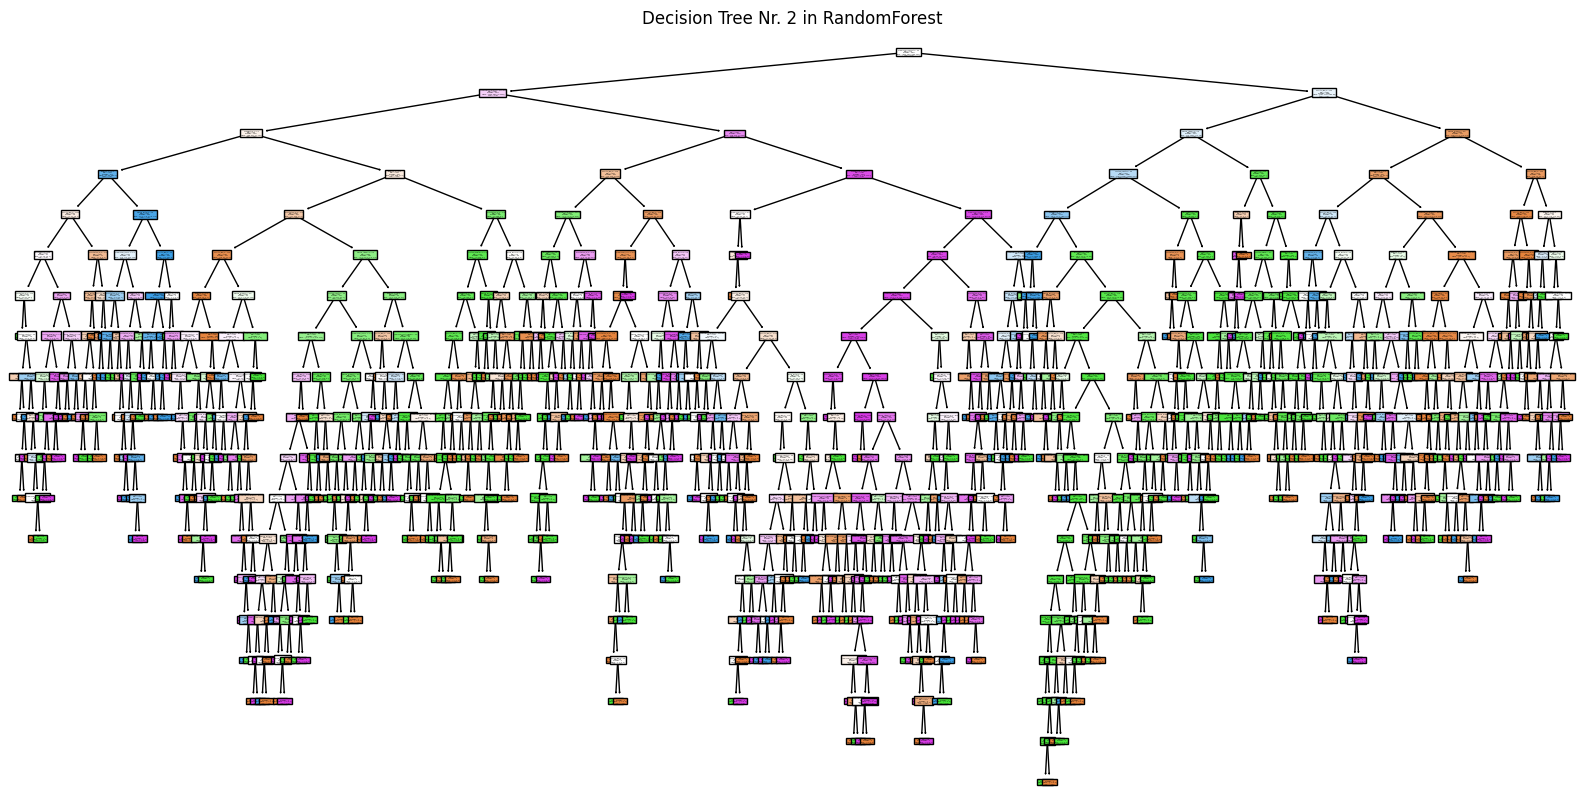

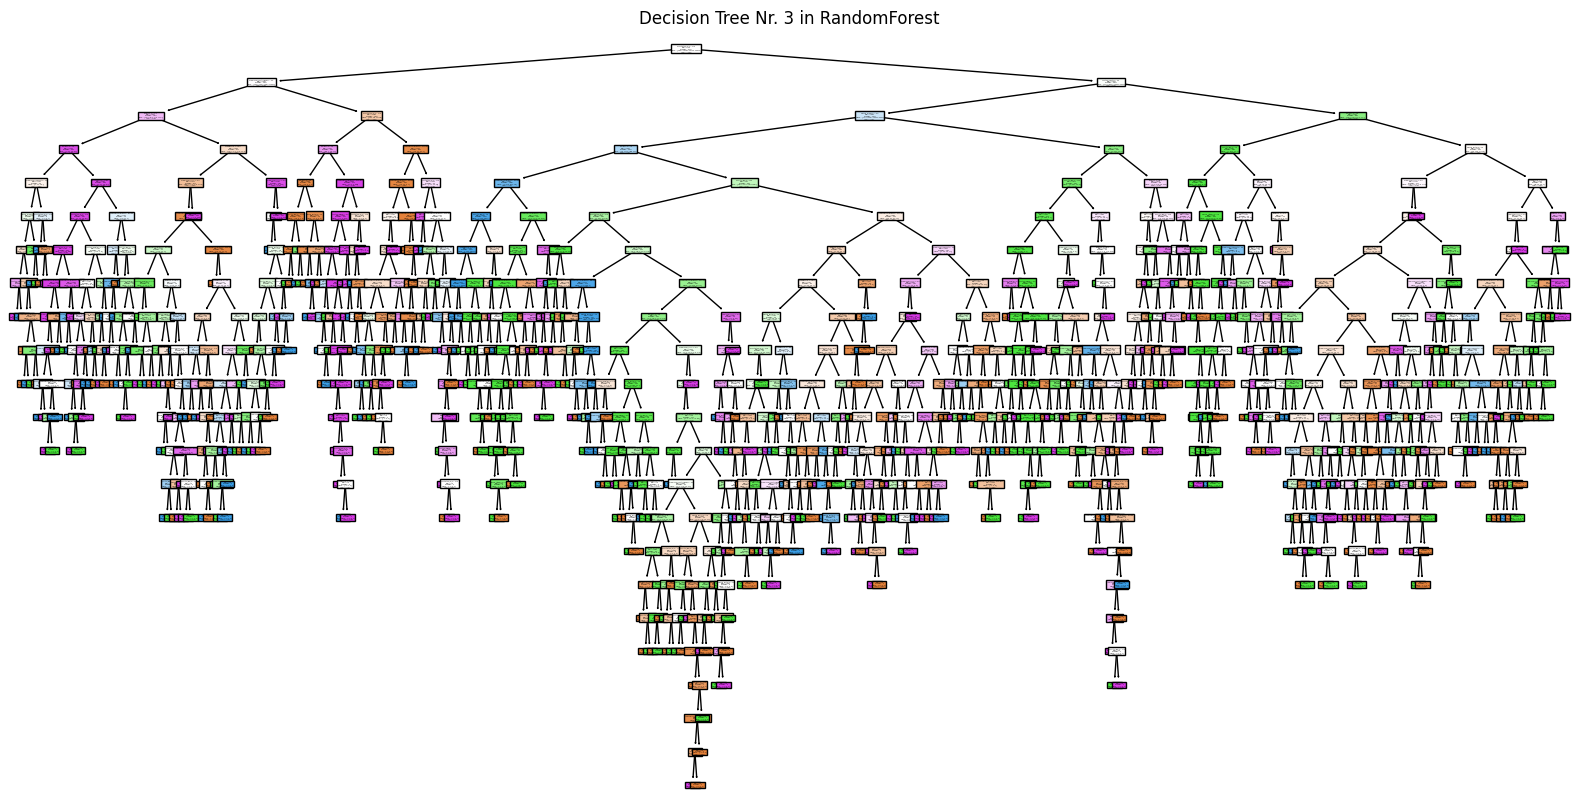

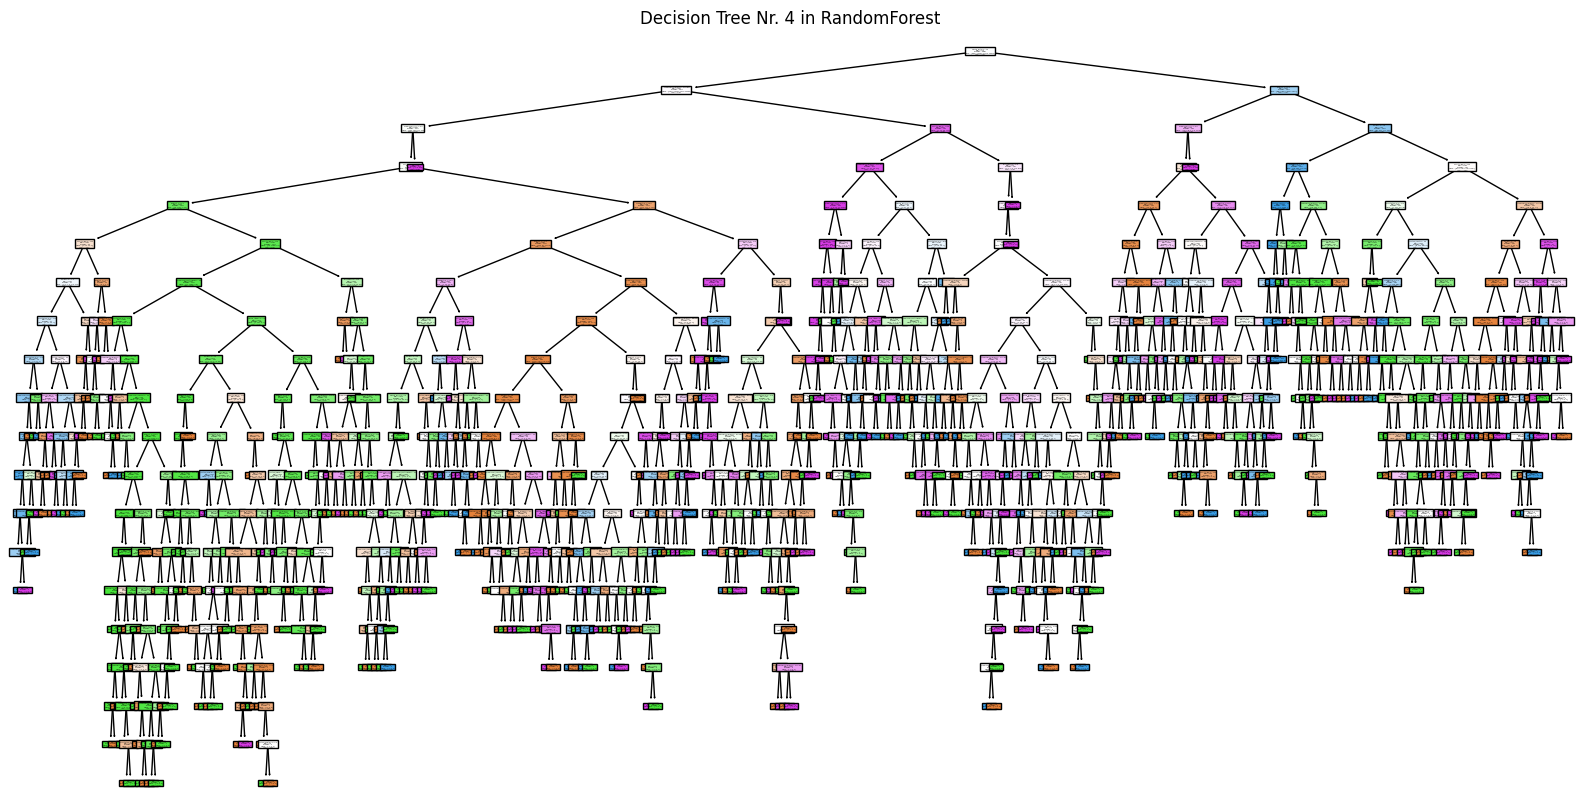

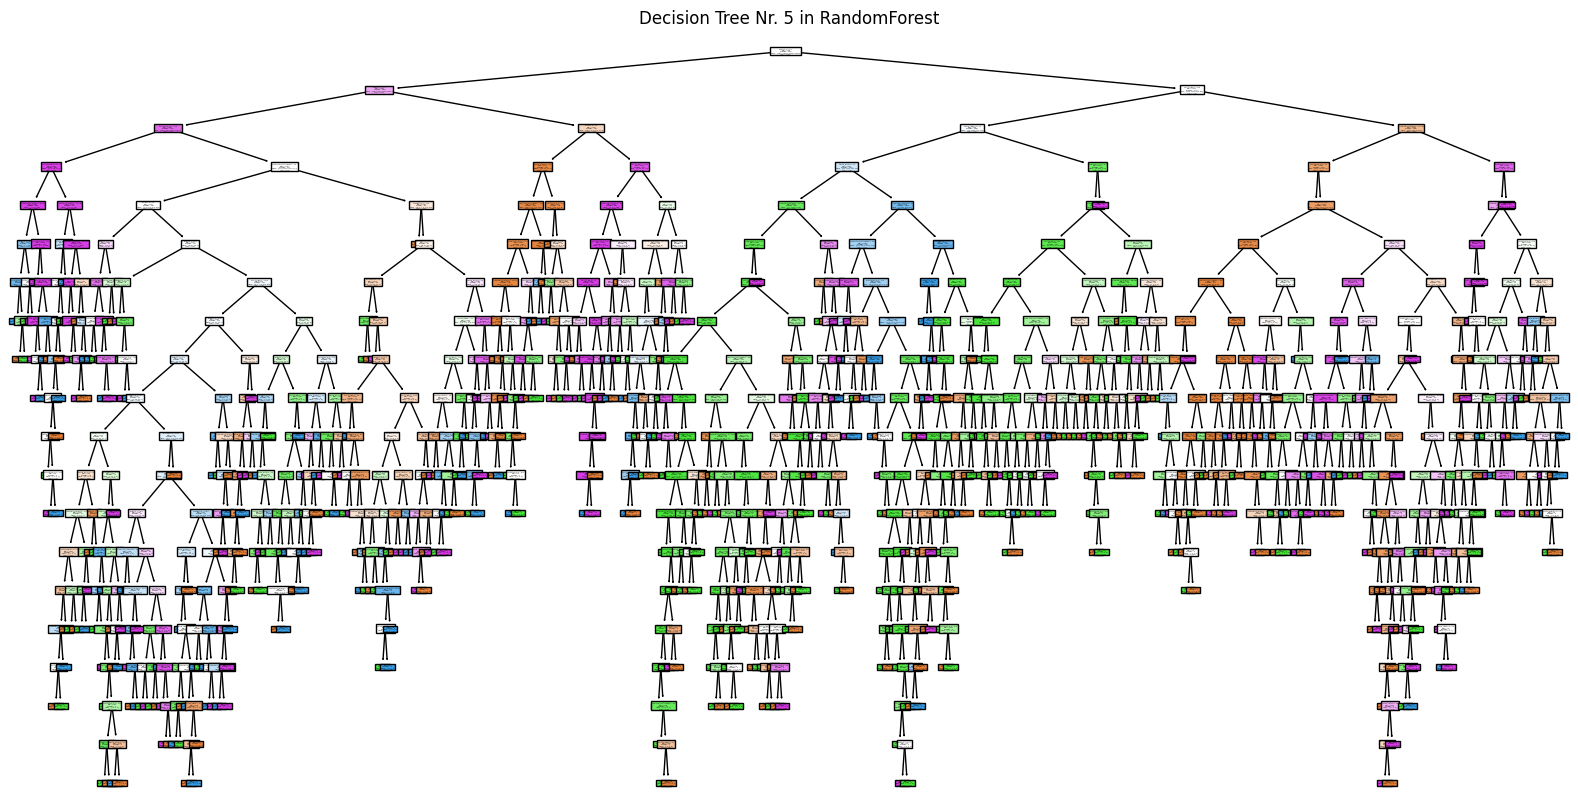

In [53]:
for i in range(5):
    plt.figure(figsize=(20, 10))
    plot_tree(
        rf.estimators_[i],
        feature_names=X.columns,
        class_names=rf.classes_,
        filled=True,
    )
    plt.title(f"Decision Tree Nr. {i+1} in RandomForest")
    plt.show()

# Jeder Baum sieht anders aus -> Training sollte funktioniert haben - YIPPIEEE

##### Die ersten 5 Bäume verkürzt anzeigen lassen - für die Lesbarkeit und so

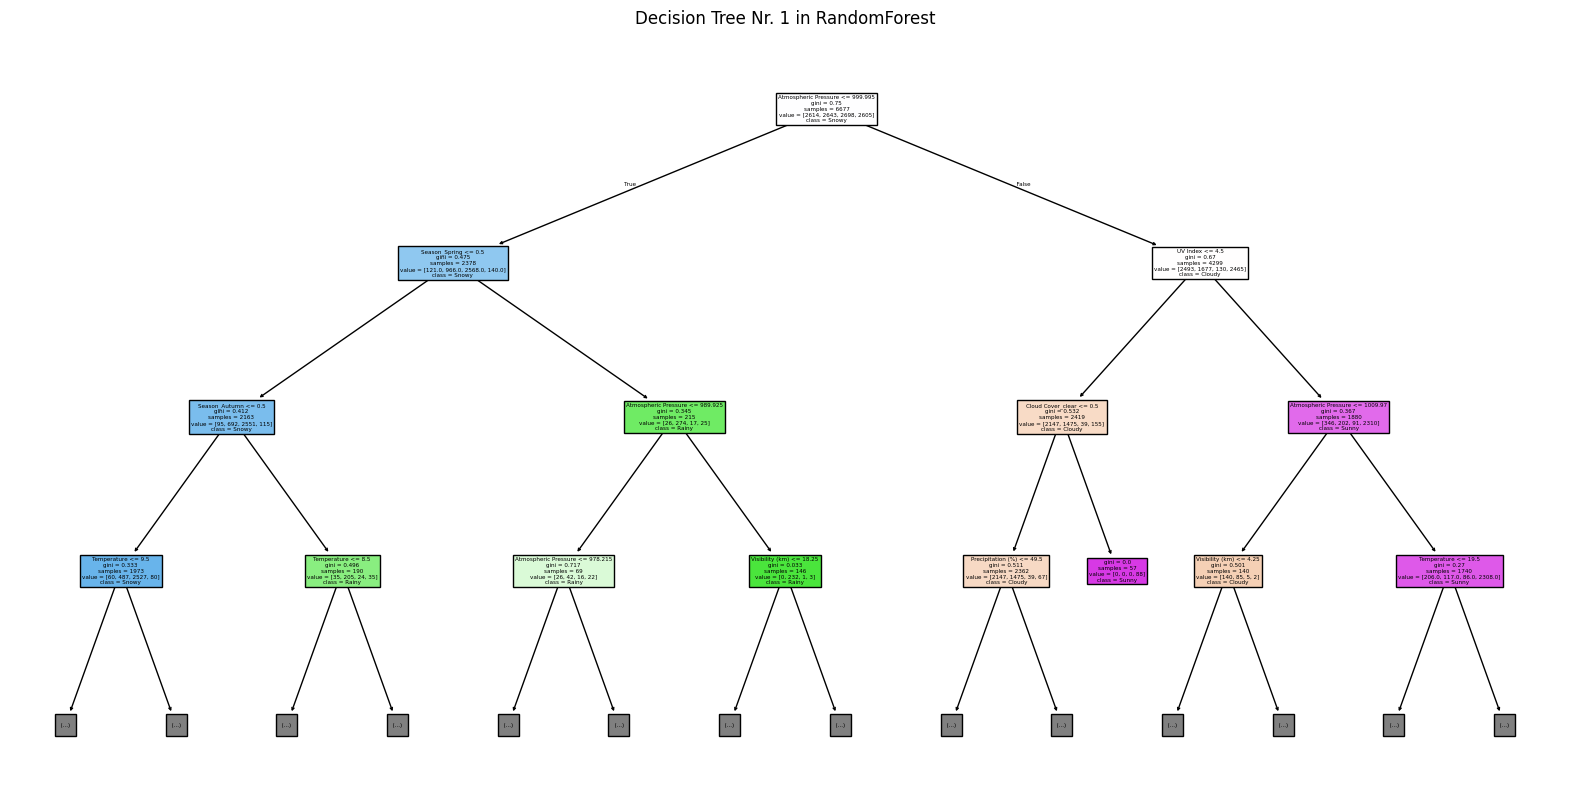

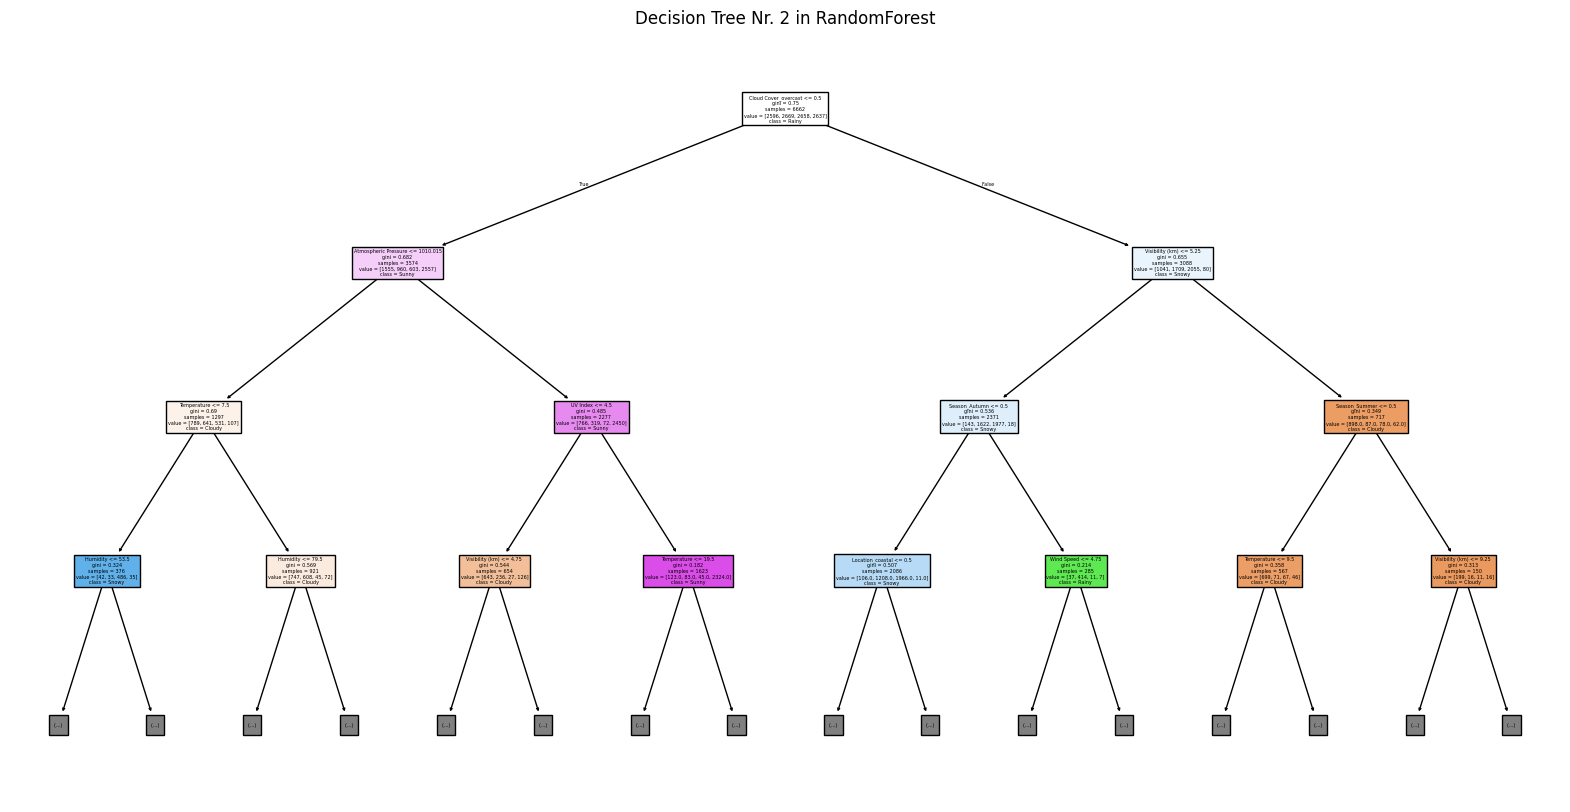

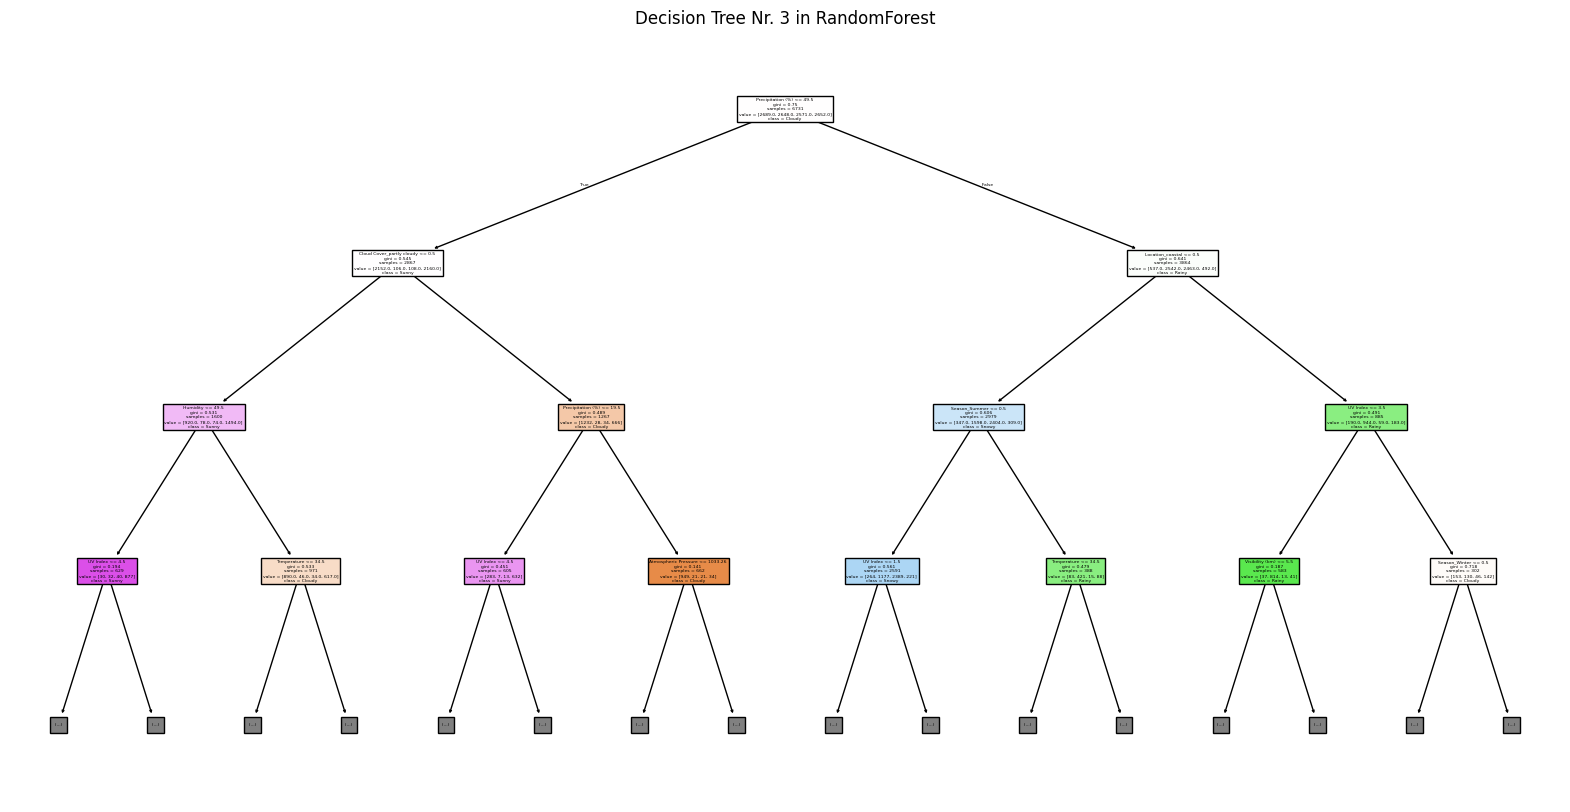

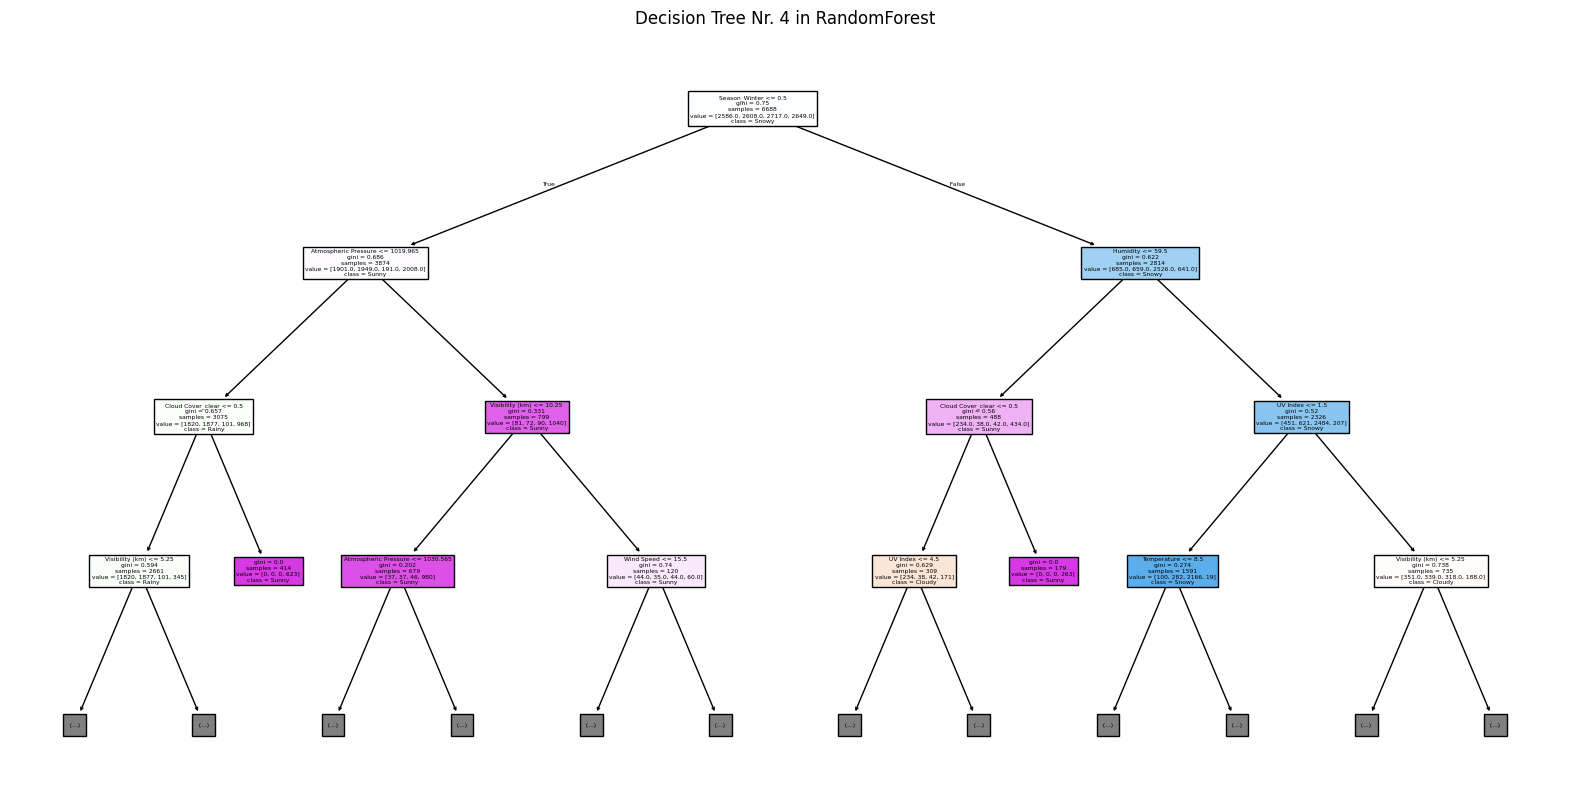

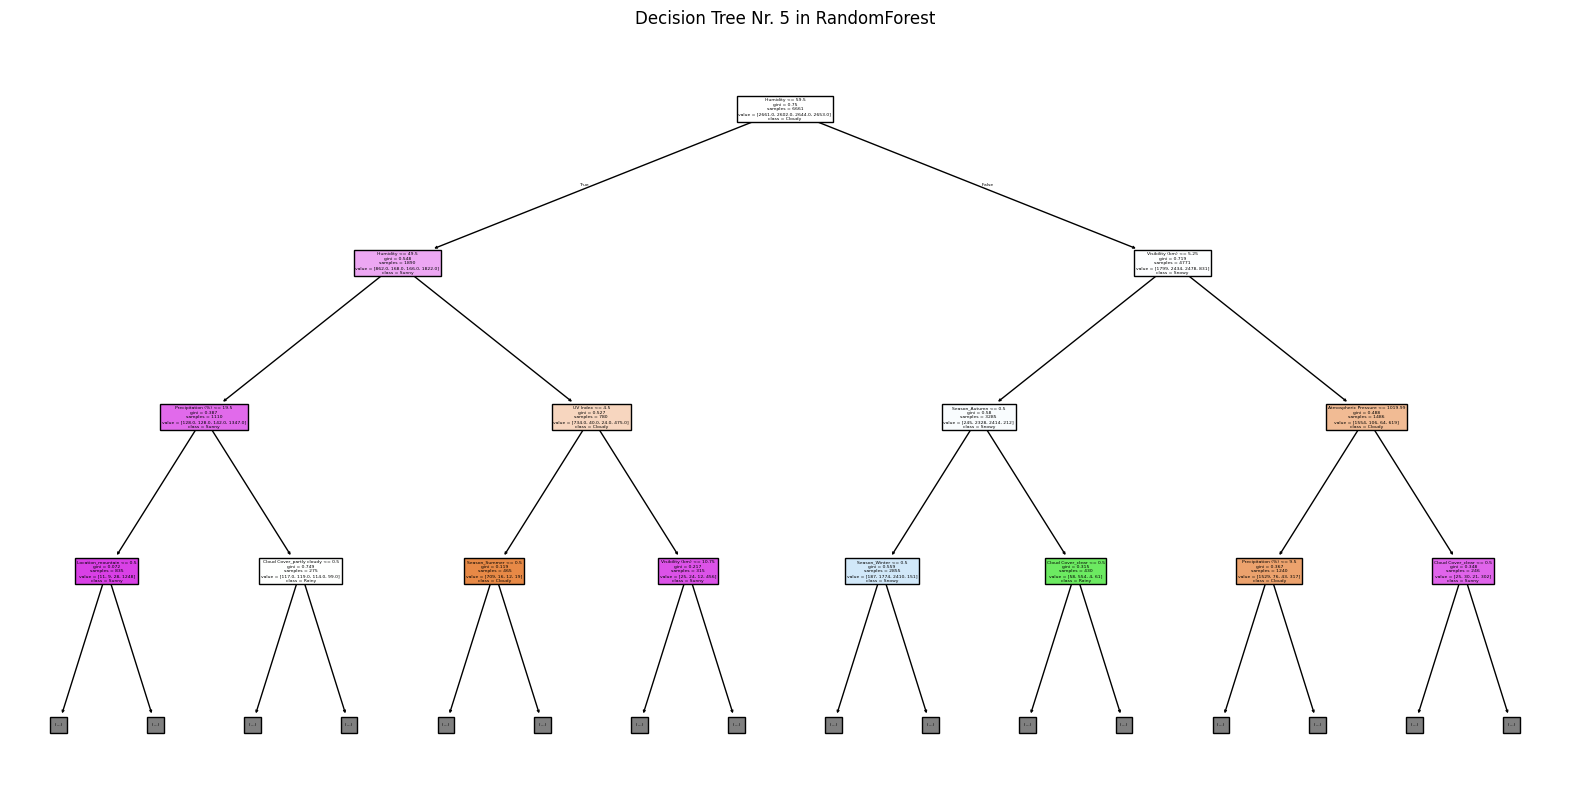

In [54]:
for i in range(5):
    plt.figure(figsize=(20, 10))
    plot_tree(
        rf.estimators_[i],
        feature_names=X.columns,
        class_names=rf.classes_,
        filled=True,
        max_depth= 3
    )
    plt.title(f"Decision Tree Nr. {i+1} in RandomForest")
    plt.show()

#### Wichtigkeit der Features überprüfen

In [55]:
importances = rf.feature_importances_ # gibt die Wichtigkeit des Features im trainierten RandomForest Modell zurück
features = X.columns # Name der Features aus dem DF zurückgeben
indices = np.argsort(importances)[::-1] # Sortieren der Features nach ihrer Wichtigkeit -> [::-1] dreht die Indizes um
# Funfact: argsort verwendet den Introsort, welcher eine Kombination aus: 
# Quicksort – für allgemeine Geschwindigkeit
# Heapsort – wenn Quicksort zu tief rekursiv wird (schützt vor schlechtem Worst-Case)
# Insertion Sort – für sehr kleine Teilbereiche (effizienter bei kleinen Arrays)
# ist


##### Plot zur Wichtigkeit der Features

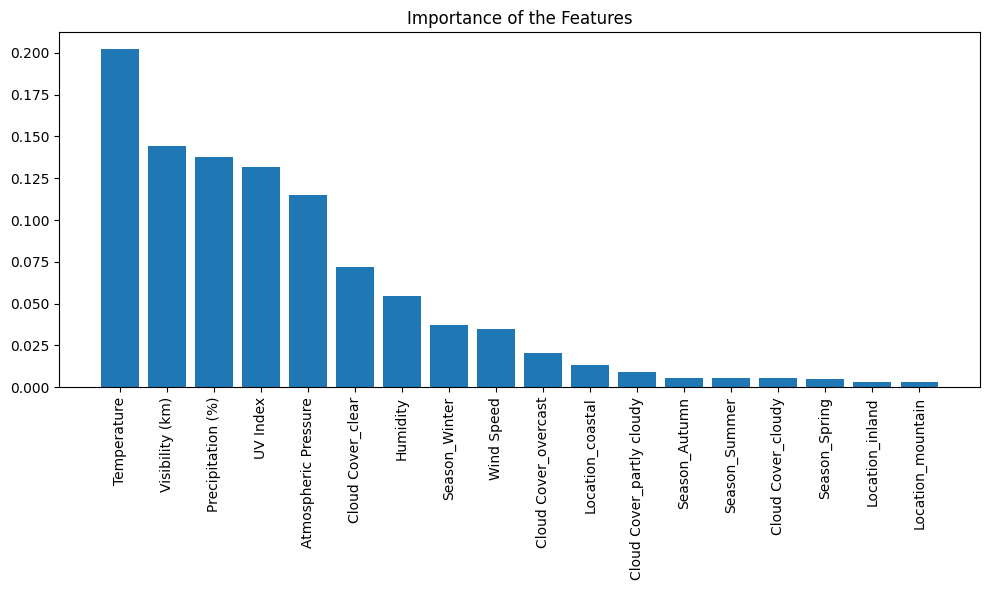

In [56]:
plt.figure(figsize=(10, 6))
plt.title("Importance of the Features")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

### Modell auf Testdaten anwenden

In [57]:
prediction = rf.predict(X_test)

### Modellevaluation

In [58]:
print("Accuracy:", accuracy_score(y_test,prediction)) # gibt die Genauigkeit als Dezimalwert an
print("\nConfusion Matrix:\n", confusion_matrix(y_test, prediction)) # Die Konfusionsmatrix gibt an, wieivele Vorhersagen tatsächlich korrekt oder falsch waren - 
# die Werte auf der Diagonalen sind die korrekt vorhergesagten Werte
print("\nClassification report:\n", classification_report(y_test, prediction))

Accuracy: 0.9136363636363637

Confusion Matrix:
 [[607  35   6  12]
 [ 34 603  15   8]
 [ 24  19 599  18]
 [ 27  18  12 603]]

Classification report:
               precision    recall  f1-score   support

      Cloudy       0.88      0.92      0.90       660
       Rainy       0.89      0.91      0.90       660
       Snowy       0.95      0.91      0.93       660
       Sunny       0.94      0.91      0.93       660

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



##### Konfusionsmatrix:

Zeilen: 
+ Tatsächliche Klassen

Spalten: 
+ Vorhergesagte Klassen

Beispiel: 
+ Klasse 0 wurde 35 mal als Klasse 1 erkannt 
+ Klasse 3 27 als Klasse 1

##### Klassifikationsbericht

Precision: 
+ Wie viele Vorhersagen für die Klasse waren korrekt?

Recall:
+ Wie viele tatsächliche Fälle dieser Klasse wurden erkannt?

F1-Score:
+ Kompromiss zwischen Precision und Recall (Durchschnitt)

Support:
+ Anzahl der echten Beispiele dieser Klasse im Testset

#### Analyse

Die Klassen "Snowy" und "Sunny" lassen sich sehr gut erkennen
"Cloudy" und "Rainy" eher weniger.

Möglicher Grund: 

"Cloudy" und "Rainy" sind sich von ihren Features / Eigenschaften her sehr ähnlich.
Ähnlicher als z.B. gegenüber "Sunny" oder "Snowy"

Ein Blick in die Konfusionsmatrix erklärt das Ganze:

35-mal wurde "Cloudy" als "Rainy" klassifiziert

→ Häufigster Fehler. Nachvollziehbar – viele bewölkte Tage können leicht mit Regenwetter verwechselt werden, vor allem bei ähnlicher Luftfeuchtigkeit

34-mal wurde "Rainy" als "Cloudy" erkannt

→ Umgekehrt ist der Fehler also ebenso häufig. Diese zweiseitige Verwechslung zeigt, dass das Modell bei bewölkten und regnerischen Tagen unsicherer ist

Snowy → Rainy: 19 Fehler

Snowy → Cloudy: 24 Fehler

→ Auch hier gibt es Verwechslung mit "Cloudy" & "Rainy", was durch gemeinsame Eigenschaften wie niedrige Temperatur und hohe Luftfeuchtigkeit erklärbar ist

Sunny → Cloudy: 27 Fehler

→ Auch sonnige Tage wurden gelegentlich als "Cloudy" erkannt – vermutlich, wenn sie nicht ganz klar waren oder die Temperatur/Feuchtegrenzwerte knapp lagen



